# 나이브 베이즈 분류 모형

나이브 베이즈 분류 모형(Naive Bayes classification model)은 대표적인 확률적 생성 모형이다. 

타겟 변수 $y$의 각 클래스 $\{C_1,\cdots,C_K\}$ 에 대한 독립 변수 $x$의 조건부 확률 분포 정보 $p(x \mid y = C_k)$ 를 사용하여 주어진 새로운 독립 변수 값 $x_{\text{new}}$에 대한 타켓 변수의 각 클래스의 조건부 확률 $p(y = C_k \mid x_{\text{new}})$ 를 추정한 후 가장 조건부 확률이 큰 클래스 $k$를 선택하는 방법이다.



## 조건부 확률의 계산

다음과 같이 베이즈 규칙을 사용하여 조건부 확률 $p(y = C_k \mid x_{\text{new}})$ 을 계산한다.

$$
P(y = C_k \mid x_{\text{new}}) = \dfrac{P(x_{\text{new}} \mid y = C_k)\; P(y = C_k)}{P(x_{\text{new}})}
$$

최종적으로는 각 클래스 $k$에 대한 확률을 비교하여 최고값을 계산하기만 하면 되므로 분모에 있는 주변 확률(marginal probability) ${P(x_{\text{new}})}$은 계산하지 않는다.

$$
P(y = C_k \mid x_{\text{new}}) \;\; \propto \;\; P(x_{\text{new}} \mid y = C_k) \; P(y = C_k)
$$


여기에서 사전 확률(prior) $P(y = C_k)$는 다음과 같이 쉽게 구할 수 있다.

$$
P(y = C_k) \approx \frac{\text{number of samples with }y = C_k}{\text{number of all samples}}
$$

$y$에 대한 $x$의 조건부 확률인 우도(likelihood)의 경우에는 일반적으로 정규 분포나 베르누이 분포와 같은 특정한 모형을 가정하여 다음과 같이 계산한다.

1. $P(x \mid y = C_k)$ 가 특정한 확률 분포 모형을 따른다고 가정한다.
2. 트레이닝 데이터 $\{x_1, \cdots, x_N\}$을 사용하여 이 모형의 모수(parameter)를 구한다.
3. 모수를 알고 있으므로 새로운 독립 변수 값 $x_{\text{new}}$이 어떤 값이 되더라도 $P(x_{\text{new}} \mid y = C_k)$ 를 계산할 수 있다.

## 우도 모형

우도의 모형으로 많이 사용하는 것은 다음과 같다.

* 베르누이 분포
  * $x$가 0 또는 1 값만을 가질 수 있다.
  * $x$가 1 이 될 확률은 고정되어 있다.
  * 예: 동전을 던진 결과로 어느 동전을 던졌는지를 찾아내는 모형
  
$$ P(x_i \mid y = C_k) = \theta_k^x (1-\theta_k)^{(1-x_i)} $$


* 다항 분포 
  * $(x_1, \ldots, x_n)$ 이 0 또는 양의 정수
  * 예: 주사위를 던진 결과로 어느 주사위를 던졌는지를 찾아내는 모형

$$ P(x_1, \ldots, x_n \mid y = C_k) = \prod_i \theta_k^{x_i}$$


* 가우시안 정규 분포
  * $x$가 실수로 특정한 값 근처
  * 예: 시험 점수로 학생이 누구인지를 찾아내는 모형
  
  $$ P(x_i \mid y = C_k) = \dfrac{1}{\sqrt{2\pi\sigma_k^2}} \exp \left(-\dfrac{(x_i-\mu_k)^2}{2\sigma_k^2}\right) $$
  

* i가 의미하는 것은 보통 동전이 여러 개(클래스가 여러 개) 있다고 가정
* 다항 분포는 하나하나가 서로 관련이 있다는 의미. 다항 분포에서 하나의 카테고리들 안의 x들은 완전히 독립은 아니다. 왜냐하면 모두 더하면 1이 되기 때문이다. 완벽한 독립은 아니지만 가우시안과 결과값은 비슷하다(거의 같다?)
* 가우시안 정규 분포는 베르누이처럼 0,1 값만 가지는 것이 아니라 모든 실수가 서로 관련이 없다. 독립적이다.

## 나이브 가정

독립 변수 $x$가 다차원(multi-dimensional) $x = (x_1, \ldots, x_n)$ 이면 위에서 사용한 우도 $P(x \mid y = C_k)$  는 원래 모든 $x_i$에 대한 결합 확률(joint probability) $P(x_1, \ldots, x_n \mid y = C_k)$ 을 사용해야 한다. 그러나 이러한 결합 확률은 실제로 입수하기 어렵기 때문에 모든 차원의 개별 독립 변수 요소들이 서로 독립(independent)이라는 가정을 흔히 사용한다. 이러한 가정을 나이브 가정(Naive assumption)이라고 한다.

나이브 가정하에서는 결합 확률이 개별 확률의 곱으로 나타난다.

$$
P(x_1, \ldots, x_n \mid y = C_k) = \prod_{i=1}^n P(x_i \mid y = C_k)
$$



$$
P(y = C_k \mid x_{\text{new}}) \;\; \propto \;\; \prod_{i=1}^n P(x_{\text{new},i} \mid y = C_k)\; P(y = C_k)
$$


* feature의 개수만큼 동전을 가지고 있다고 가정 
* 가우시안의 경우에는 임의의 실수가 나올 수 있다. 
* 다항 분포는 상대적인 것 까지 나오게 된다.
* ovr이나 ovo 방식으로 전환할 필요가 없다. 멀티클래스의 경우 각각의 모형에서 모형을 더 만들면 되기 때문에. 그냥 1번 더 계산을 더하면 된다. 
* 차원이 아무리 늘어나도 알고리즘을 바꿀 필요가 없다. 자동적으로 멀티클래스가 된다. 

## Scikit-Learn에서 제공하는 나이브 베이즈 모형

Scikit-Learn의 naive_bayes 서브패키지에서는 다음과 같은 세가지 나이브 베이즈 모형 클래스를 제공한다.

* [`BernoulliNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html): 베르누이 분포 나이브 베이즈
* [`MultinomialNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html): 다항 분포 나이브 베이즈
* [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html):	가우시안 정규 분포 나이브 베이즈

이 클래스들은 다음과 같은 속성값 및 메서드를 가진다.

* `classes_`: 공통

 * 타겟 Y의 클래스(라벨)


* `class_count_`: 공통

 * 타겟 Y의 값이 특정한 클래스인 표본 데이터의 수


* `feature_count_`: 베르누이 분포나 다항 분포 

 * 타겟 Y의 값이 특정한 클래스이면서 독립 변수 X의 값이 1인 표본 데이터의 수 (베르누이 분포).
 * 타겟 Y의 값이 특정한 클래스인 독립 변수 X의 값의 합 (다항 분포). 독립 변수 값이 1또는 0만 가지는 경우에는 표본 데이터의 수가 된다. 
 

* `class_prior_`: 가우시안 정규 분포

 * 타겟 Y의 무조건부 확률 분포 $ P(Y) $
 

* `class_log_prior_`: 베르누이 분포나 다항 분포 

 * 타겟 Y의 무조건부 확률 분포의 로그 $ \log P(Y) $
 

* `theta_ `, `sigma_` : 가우시안 정규 분포

 * 가우시안 정규 분포의 기댓값 $\mu$ 과 분산 $\sigma^2$
 

* `feature_log_prob_ `: 베르누이 분포나 다항 분포 

 * 베르누이 분포 혹은 다항 분포의 모수 벡터의 로그
 $$ \log \theta = (\log \theta_1, \ldots, \log \theta_n) = \left( \log \dfrac{N_i}{N}, \ldots, \log \dfrac{N_n}{N} \right)$$
 
 * 스무딩(smoothing)
 $$ \hat{\theta} = \frac{ N_{i} + \alpha}{N + \alpha n} $$ 
 
* `predict_proba(x_new)` : 공통

 * 조건부 확률 분포 $ P(Y \mid X_{\text{new}}) $

디폴트 파라미터는 알파가 1이다. 원래 1/6이라면 2/12라고 하는 것이다. 기본점수를 주는 것이다. 보통은 알파를 1로 주는 것

## 가우시안 정규 분포 나이브 베이즈 모형

In [4]:
np.random.seed(0)
X0 = sp.stats.norm(-2, 1).rvs(40)
X1 = sp.stats.norm(2, 1).rvs(60)
X = np.hstack([X0, X1])[:, np.newaxis]
y0 = np.zeros(40)
y1 = np.ones(60)
y = np.hstack([y0, y1])

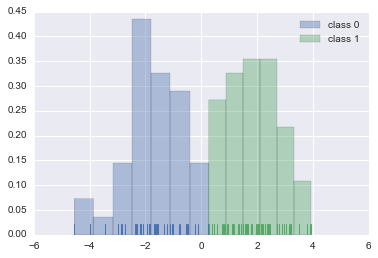

In [5]:
sns.distplot(X0, rug=True, kde=False, norm_hist=True, label="class 0")
sns.distplot(X1, rug=True, kde=False, norm_hist=True, label="class 1")
plt.legend()
plt.xlim(-6, 6)
plt.show()

In [6]:
X0.mean(), X0.std()

(-1.6874575267838261, 1.0643338564384415)

In [7]:
X1.mean(), X1.std()

(1.8913183770800257, 0.93105751579472784)

In [8]:
from sklearn.naive_bayes import GaussianNB
clf_norm = GaussianNB().fit(X, y)

In [10]:
clf_norm.classes_   # y값이 가질 수 있는 클래스들

array([ 0.,  1.])

In [12]:
clf_norm.class_count_   # 각각 y 값의 갯수

array([ 40.,  60.])

In [14]:
clf_norm.class_prior_   # 각각 y의 확률(사전)

array([ 0.4,  0.6])

In [15]:
clf_norm.theta_, clf_norm.sigma_

(array([[-1.68745753],
        [ 1.89131838]]), array([[ 1.13280656],
        [ 0.8668681 ]]))

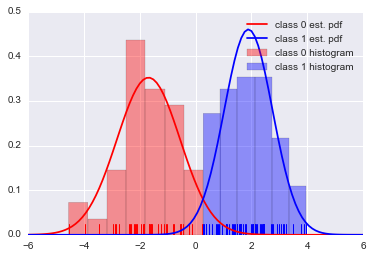

In [16]:
xx = np.linspace(-6, 6, 100)
p0 = sp.stats.norm(clf_norm.theta_[0], clf_norm.sigma_[0]).pdf(xx)
p1 = sp.stats.norm(clf_norm.theta_[1], clf_norm.sigma_[1]).pdf(xx)
sns.distplot(X0, rug=True, kde=False, norm_hist=True, color='r', label='class 0 histogram')
sns.distplot(X1, rug=True, kde=False, norm_hist=True, color='b', label='class 1 histogram')
plt.plot(xx, p0, c='r', label='class 0 est. pdf')
plt.plot(xx, p1, c='b', label='class 1 est. pdf')
plt.legend()
plt.show()

In [18]:
x_new = -1
clf_norm.predict_proba([[x_new]])  # predict_proba(x_new) : 조건부 확률 분포

array([[ 0.98327446,  0.01672554]])

In [19]:
px = sp.stats.norm(clf_norm.theta_, np.sqrt(clf_norm.sigma_)).pdf(x_new)
px

array([[ 0.30425666],
       [ 0.00345028]])

In [24]:
clf_norm.class_prior_

array([ 0.4,  0.6])

In [20]:
p = px.flatten() * clf_norm.class_prior_
p

array([ 0.12170266,  0.00207017])

In [23]:
p / p.sum()   # nomalize해서 합치면 1이 되는 확률값으로 변환

array([ 0.98327446,  0.01672554])

### 실습. 2과목에 학생 3명의 경우 위와 같은 결과 도출해보기

In [25]:
X00 = sp.stats.norm(-3, 1).rvs(64)
X01 = sp.stats.norm(-4, 1).rvs(64)

X10 = sp.stats.norm(-1, 1).rvs(66)
X11 = sp.stats.norm(0, 1).rvs(66)

X20 = sp.stats.norm(3, 1).rvs(70)
X21 = sp.stats.norm(4, 1).rvs(70)

X1 = np.hstack([X00, X10, X20])[:, np.newaxis]
X2 = np.hstack([X01, X11, X21])[:, np.newaxis]
X = np.hstack([X1, X2])

y0 = np.zeros(64)
y1 = np.ones(66)
y2 = np.ones(70)*2
y = np.hstack([y0, y1, y2])

In [26]:
X.shape, y.shape

((200, 2), (200,))

In [27]:
dfX = pd.DataFrame(X)
dfy = pd.DataFrame(y)
dfX.tail(2)

,0,1
198,2.430688,2.981958
199,3.269904,3.922145


In [28]:
dfy.tail(3)

,0
197,2.0
198,2.0
199,2.0


In [29]:
df = pd.concat([dfX, dfy], axis=1)

In [30]:
df.tail(2)

,0,1,0
198,2.430688,2.981958,2.0
199,3.269904,3.922145,2.0


In [31]:
df.columns = ["X1", "X2", "y"]

In [32]:
df.head(2)

,X1,X2,y
0,-1.116849,-5.225436,0.0
1,-4.347759,-3.155637,0.0


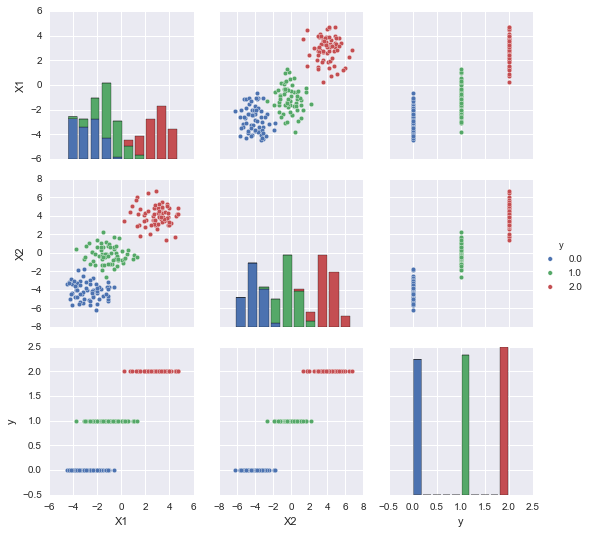

In [33]:
sns.pairplot(df, hue="y")

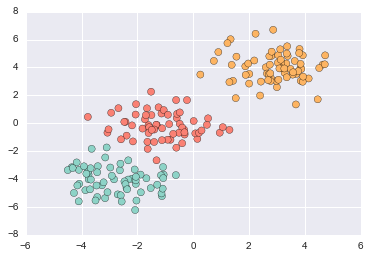

In [34]:
cmap = mpl.colors.ListedColormap(sns.color_palette("Set3"))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)

(-8, 6)

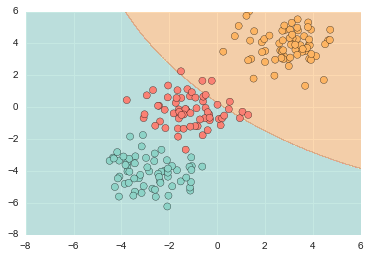

In [35]:
xmin, xmax = -8, 6
ymin, ymax = -8, 6
XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
ZZ = np.reshape(clf_norm.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)

cmap = mpl.colors.ListedColormap(sns.color_palette("Set3"))
plt.contourf(XX, YY, ZZ, cmap=cmap, alpha=0.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap=cmap)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

In [36]:
clf_norm = GaussianNB().fit(X, y)

In [37]:
clf_norm.classes_

array([ 0.,  1.,  2.])

In [38]:
clf_norm.class_count_

array([ 64.,  66.,  70.])

In [39]:
clf_norm.class_prior_

array([ 0.32,  0.33,  0.35])

In [40]:
clf_norm.theta_, clf_norm.sigma_

(array([[-2.79580303, -4.07623828],
        [-1.11459868, -0.19881582],
        [ 2.93371462,  3.9782565 ]]), array([[ 1.05219949,  0.85698059],
        [ 1.07054849,  0.82261871],
        [ 0.9731283 ,  1.06324558]]))

In [41]:
clf_norm = GaussianNB().fit(df.ix[:, :2], df.ix[:, -1])

In [42]:
clf_norm.classes_

array([ 0.,  1.,  2.])

In [43]:
clf_norm.class_count_

array([ 64.,  66.,  70.])

In [44]:
clf_norm.theta_, clf_norm.sigma_

(array([[-2.79580303, -4.07623828],
        [-1.11459868, -0.19881582],
        [ 2.93371462,  3.9782565 ]]), array([[ 1.05219949,  0.85698059],
        [ 1.07054849,  0.82261871],
        [ 0.9731283 ,  1.06324558]]))

In [45]:
print(clf_norm.theta_, "\n", clf_norm.sigma_)

[[-2.79580303 -4.07623828]
 [-1.11459868 -0.19881582]
 [ 2.93371462  3.9782565 ]] 
 [[ 1.05219949  0.85698059]
 [ 1.07054849  0.82261871]
 [ 0.9731283   1.06324558]]


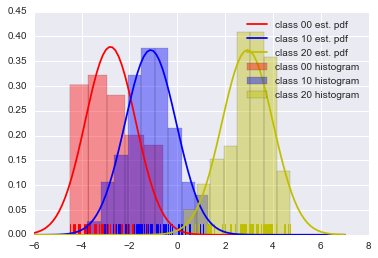

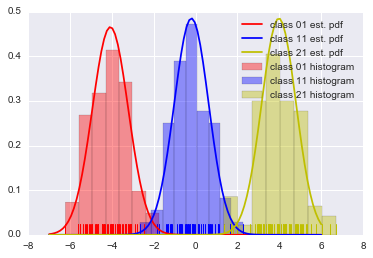

In [46]:
xx = np.linspace(-6, 7, 100)
p0 = sp.stats.norm(clf_norm.theta_[0][0], clf_norm.sigma_[0][0]).pdf(xx)
p1 = sp.stats.norm(clf_norm.theta_[1][0], clf_norm.sigma_[1][0]).pdf(xx)                                                               
p2 = sp.stats.norm(clf_norm.theta_[2][0], clf_norm.sigma_[1][0]).pdf(xx)                                                               
sns.distplot(X00, rug=True, kde=False, norm_hist=True, color="r", label="class 00 histogram")
sns.distplot(X10, rug=True, kde=False, norm_hist=True, color="b", label="class 10 histogram")
sns.distplot(X20, rug=True, kde=False, norm_hist=True, color="y", label="class 20 histogram")
plt.plot(xx, p0, c="r", label="class 00 est. pdf")
plt.plot(xx, p1, c="b", label="class 10 est. pdf")
plt.plot(xx, p2, c="y", label="class 20 est. pdf")
plt.legend()
plt.show()

xx = np.linspace(-7, 6, 100)
p0 = sp.stats.norm(clf_norm.theta_[0][1], clf_norm.sigma_[0][1]).pdf(xx)
p1 = sp.stats.norm(clf_norm.theta_[1][1], clf_norm.sigma_[1][1]).pdf(xx)                                                               
p2 = sp.stats.norm(clf_norm.theta_[2][1], clf_norm.sigma_[1][1]).pdf(xx)                                                               
sns.distplot(X01, rug=True, kde=False, norm_hist=True, color="r", label="class 01 histogram")
sns.distplot(X11, rug=True, kde=False, norm_hist=True, color="b", label="class 11 histogram")
sns.distplot(X21, rug=True, kde=False, norm_hist=True, color="y", label="class 21 histogram")
plt.plot(xx, p0, c="r", label="class 01 est. pdf")
plt.plot(xx, p1, c="b", label="class 11 est. pdf")
plt.plot(xx, p2, c="y", label="class 21 est. pdf")
plt.legend()
plt.show()

In [47]:
x_new = [3, 1]
clf_norm.predict_proba([x_new])

array([[  2.17441229e-12,   1.00961851e-02,   9.89903815e-01]])

In [48]:
px = sp.stats.norm(clf_norm.theta_, np.sqrt(clf_norm.sigma_)).pdf(x_new)

In [49]:
p_x0 = px[:, 0] * clf_norm.class_prior_
p_x1 = px[:, 1] * clf_norm.class_prior_

In [50]:
p_x0 / p_x0.sum()

array([  1.02933490e-07,   3.31545575e-04,   9.99668351e-01])

In [51]:
p_x1 / p_x1.sum()

array([  6.50251140e-07,   9.66660466e-01,   3.33388833e-02])

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [53]:
model = LogisticRegression().fit(X, y)
confusion_matrix(y, model.predict(X))

array([[62,  2,  0],
       [ 4, 59,  3],
       [ 0,  0, 70]])

In [54]:
print(classification_report(y, model.predict(X)))

             precision    recall  f1-score   support

        0.0       0.94      0.97      0.95        64
        1.0       0.97      0.89      0.93        66
        2.0       0.96      1.00      0.98        70

avg / total       0.96      0.95      0.95       200



In [55]:
y_pred = clf_norm.predict(X)

In [56]:
confusion_matrix(y, y_pred)

array([[64,  0,  0],
       [ 1, 65,  0],
       [ 0,  0, 70]])

In [57]:
print(classification_report(y, y_pred, target_names=["X0", "X1", "X2"]))

             precision    recall  f1-score   support

         X0       0.98      1.00      0.99        64
         X1       1.00      0.98      0.99        66
         X2       1.00      1.00      1.00        70

avg / total       1.00      0.99      1.00       200



(-8, 6)

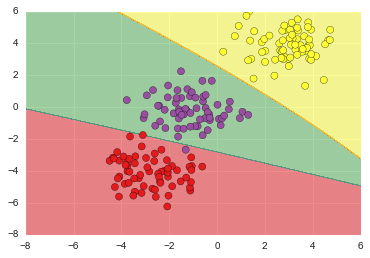

In [58]:
xmin, xmax = -8, 6
ymin, ymax = -8, 6
XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
ZZ = np.reshape(clf_norm.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)

cmap = mpl.colors.ListedColormap(sns.color_palette("Set1"))
plt.contourf(XX, YY, ZZ, cmap=cmap, alpha=0.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap=cmap)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

## 베르누이 분포 나이브 베이즈 모형

베르누이 나이브 베이즈 모형에서는 타겟 변수뿐 아니라 독립 변수도 0 또는 1의 값을 가져야 한다. 예를 들어 전자우편과 같은 문서 내에 특정한 단어가 포함되어 있는지의 여부는 베르누이 확률 변수로 모형화할 수 있으므로 스팸 필터링에 사용할 수 있다.

In [59]:
np.random.seed(0)
X = np.random.randint(2, size=(10, 4))
y = np.array([0,0,0,0,1,1,1,1,1,1])
print(X)
print(y)

[[0 1 1 0]
 [1 1 1 1]
 [1 1 1 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 1 1 0]
 [0 1 1 1]
 [1 0 1 0]
 [1 0 1 1]
 [0 1 1 0]]
[0 0 0 0 1 1 1 1 1 1]


In [60]:
from sklearn.naive_bayes import BernoulliNB
clf_bern = BernoulliNB().fit(X, y)

In [61]:
clf_bern.classes_

array([0, 1])

In [62]:
clf_bern.class_count_

array([ 4.,  6.])

In [63]:
np.exp(clf_bern.class_log_prior_)

array([ 0.4,  0.6])

In [64]:
fc = clf_bern.feature_count_
fc

array([[ 2.,  4.,  3.,  1.],
       [ 2.,  3.,  5.,  3.]])

In [65]:
fc / np.repeat(clf_bern.class_count_[:, np.newaxis], 4, axis=1)

array([[ 0.5       ,  1.        ,  0.75      ,  0.25      ],
       [ 0.33333333,  0.5       ,  0.83333333,  0.5       ]])

In [66]:
theta = np.exp(clf_bern.feature_log_prob_)
theta

array([[ 0.5       ,  0.83333333,  0.66666667,  0.33333333],
       [ 0.375     ,  0.5       ,  0.75      ,  0.5       ]])

In [67]:
x_new = np.array([1, 1, 0, 0])

In [68]:
clf_bern.predict_proba([x_new])

array([[ 0.72480181,  0.27519819]])

In [69]:
p = ((theta**x_new)*(1-theta)**(1-x_new)).prod(axis=1)*np.exp(clf_bern.class_log_prior_)
p / p.sum()

array([ 0.72480181,  0.27519819])

In [70]:
x_new = np.array([0, 0, 1, 1])

In [71]:
clf_bern.predict_proba([x_new])

array([[ 0.09530901,  0.90469099]])

In [72]:
p = ((theta**x_new)*(1-theta)**(1-x_new)).prod(axis=1)*np.exp(clf_bern.class_log_prior_)
p / p.sum()

array([ 0.09530901,  0.90469099])

## 다항 분포 나이브 베이즈 모형

In [73]:
from sklearn.naive_bayes import MultinomialNB
clf_mult = MultinomialNB().fit(X, y)

In [74]:
clf_mult.classes_

array([0, 1])

In [75]:
clf_mult.class_count_

array([ 4.,  6.])

In [76]:
fc = clf_mult.feature_count_
fc

array([[ 2.,  4.,  3.,  1.],
       [ 2.,  3.,  5.,  3.]])

In [77]:
fc / np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1)

array([[ 0.2       ,  0.4       ,  0.3       ,  0.1       ],
       [ 0.15384615,  0.23076923,  0.38461538,  0.23076923]])

In [78]:
clf_mult.alpha

1.0

In [79]:
(fc + clf_mult.alpha) / (np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1) + clf_mult.alpha * X.shape[1])

array([[ 0.21428571,  0.35714286,  0.28571429,  0.14285714],
       [ 0.17647059,  0.23529412,  0.35294118,  0.23529412]])

In [80]:
theta = np.exp(clf_mult.feature_log_prob_)
theta

array([[ 0.21428571,  0.35714286,  0.28571429,  0.14285714],
       [ 0.17647059,  0.23529412,  0.35294118,  0.23529412]])

In [81]:
x_new = np.array([21, 35, 29, 14])
clf_mult.predict_proba([x_new])

array([[ 0.99431066,  0.00568934]])

In [82]:
p = (theta**x_new).prod(axis=1)*np.exp(clf_bern.class_log_prior_)
p / p.sum()

array([ 0.99431066,  0.00568934])

In [83]:
x_new = np.array([18, 24, 35, 24])
clf_mult.predict_proba([x_new])

array([[ 0.00189418,  0.99810582]])

In [84]:
x_new = np.array([4, 4, 5, 4])
clf_mult.predict_proba([x_new])

array([[ 0.26655873,  0.73344127]])

## 예 1: 뉴스 그룹

In [85]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.cross_validation import train_test_split
news = fetch_20newsgroups(subset="all")
X_train, X_test, y_train, y_test = train_test_split(news.data, news.target, test_size=0.1, random_state=1)

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

clf_1 = Pipeline([
            ('vect', CountVectorizer()), 
            ('clf', MultinomialNB()),
        ])
clf_2 = Pipeline([
            ('vect', TfidfVectorizer()),
            ('clf', MultinomialNB()),
        ])
clf_3 = Pipeline([
            ('vect', TfidfVectorizer(token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b")),
            ('clf', MultinomialNB()),
        ])
clf_4 = Pipeline([
            ('vect', TfidfVectorizer(stop_words="english", 
                                     token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b")),
            ('clf', MultinomialNB()),
        ])
clf_5 = Pipeline([
            ('vect', TfidfVectorizer(stop_words="english", 
                                     token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b")),
            ('clf', MultinomialNB(alpha=0.01)),
        ])

In [87]:
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem

for i, clf in enumerate([clf_1, clf_2, clf_3, clf_4, clf_5]):
    scores = cross_val_score(clf, X_test, y_test, cv=5)
    print(("Model {0:d}: Mean score: {1:.3f} (+/-{2:.3f})").format(i, np.mean(scores), sem(scores)))

Model 0: Mean score: 0.607 (+/-0.005)
Model 1: Mean score: 0.548 (+/-0.013)
Model 2: Mean score: 0.614 (+/-0.008)
Model 3: Mean score: 0.741 (+/-0.004)
Model 4: Mean score: 0.808 (+/-0.008)


In [88]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

news = fetch_20newsgroups(subset="all")
X_train, X_test, y_train, y_test = train_test_split(news.data, news.target, test_size=0.1, random_state=1)

In [89]:
clf_0 = Pipeline([
        ("vect", CountVectorizer()),
        ("clf", LogisticRegression())
    ])

In [90]:
clf_0.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [91]:
y_pred = clf_0.predict(X_train)

In [92]:
confusion_matrix(y_train, y_pred)

array([[721,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0, 872,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 889,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 872,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 862,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 887,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 881,   0,   0,   0,   0,   0,   1,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 881,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1, 892,   0,   0,  

In [93]:
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       721
          1       1.00      1.00      1.00       872
          2       1.00      1.00      1.00       889
          3       1.00      1.00      1.00       872
          4       1.00      1.00      1.00       862
          5       1.00      1.00      1.00       887
          6       1.00      1.00      1.00       882
          7       1.00      1.00      1.00       881
          8       1.00      1.00      1.00       893
          9       1.00      1.00      1.00       893
         10       1.00      1.00      1.00       889
         11       1.00      1.00      1.00       887
         12       1.00      1.00      1.00       905
         13       1.00      1.00      1.00       900
         14       1.00      1.00      1.00       886
         15       1.00      1.00      1.00       887
         16       1.00      1.00      1.00       812
         17       1.00      1.00      1.00   

In [94]:
y_pred = clf_0.predict(X_test)

In [95]:
confusion_matrix(y_test, y_pred)

array([[ 71,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   1,   0,   0,   0,   4],
       [  0,  87,   2,   3,   0,   4,   1,   1,   0,   0,   0,   0,   1,
          2,   0,   0,   0,   0,   0,   0],
       [  0,   3,  88,   2,   0,   1,   1,   0,   0,   0,   0,   0,   0,
          1,   0,   0,   0,   0,   0,   0],
       [  0,   0,   3,  98,   6,   0,   0,   0,   1,   0,   0,   0,   2,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   3,  90,   0,   5,   0,   0,   0,   0,   0,   2,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   7,   4,   0,   0,  87,   0,   0,   0,   0,   0,   1,   1,
          0,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,  87,   4,   0,   1,   0,   0,   1,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1,   1,   0,   2,  98,   1,   1,   0,   0,   5,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0,   0, 101,   0,   0,  

In [96]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.91      0.93        78
          1       0.84      0.86      0.85       101
          2       0.90      0.92      0.91        96
          3       0.84      0.89      0.87       110
          4       0.89      0.89      0.89       101
          5       0.95      0.86      0.90       101
          6       0.91      0.94      0.92        93
          7       0.92      0.90      0.91       109
          8       0.96      0.98      0.97       103
          9       0.97      0.94      0.95       101
         10       0.99      0.99      0.99       110
         11       0.94      0.96      0.95       104
         12       0.79      0.87      0.83        79
         13       0.93      0.96      0.95        90
         14       0.99      0.96      0.97       101
         15       0.94      0.97      0.96       110
         16       0.95      0.93      0.94        98
         17       0.99      0.99      0.99   

## 감성 분석 Sentiment Analysis

* 서울대 박은정님의 네이버 영화 감상평에 대한 감성 분석 예제
 * https://github.com/e9t/nsmc
 * https://www.lucypark.kr/slides/2015-pyconkr/

### 데이터 전처리

* nsmc gitub에서 열어보면 있다. 다하는 것은 무리라서 만 개만 뽑아서 테스트해보겠다. 

In [97]:
import codecs
def read_data(filename):
    with codecs.open(filename, encoding='utf-8', mode='r') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]   # header 제외
    return data
train_data = read_data('ratings_train.txt')
test_data = read_data('ratings_test.txt')

In [101]:
X = list(zip(*train_data))[1]   # 같이 있던 애들을 쪼개
y = list(zip(*train_data))[2]   # zip()은 묶어주는 것, zip(*)은 unzip. 풀어주는 것
y = np.array(y, dtype=int)

In [99]:
len(X), len(y)

(150000, 150000)

In [100]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=10000, test_size=10000)
len(X_train), len(X_test)

(10000, 10000)

In [102]:
from konlpy.utils import pprint
pprint((X[0], y[0]))

('아 더빙.. 진짜 짜증나네요 목소리', 0)


In [103]:
import jpype

In [105]:
from konlpy.tag import Twitter
pos_tagger = Twitter()

C:\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


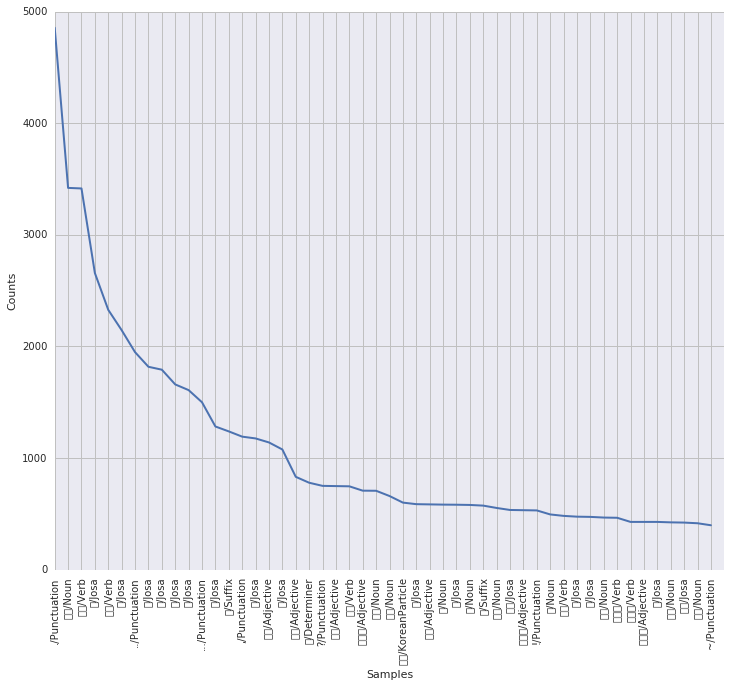

Wall time: 1min 2s


In [106]:
%%time
from konlpy.tag import Twitter
pos_tagger = Twitter()

def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

train_docs = [(tokenize(row[1]), row[2]) for row in train_data[:10000]]
tokens = [t for d in train_docs for t in d[0]]
import nltk
text = nltk.Text(tokens, name='NMSC')
mpl.rcParams["font.family"] = "NanumGothic"
plt.figure(figsize=(12,10))
text.plot(50)
plt.show()

### CountVectorize 사용

In [107]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf_1 = Pipeline([
            ('vect', CountVectorizer()), 
            ('clf', MultinomialNB()),
        ])

In [108]:
%%time 
clf_1.fit(X_train, y_train)

Wall time: 8.85 s


Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [109]:
pprint(list(clf_1.named_steps["vect"].vocabulary_)[:10])

['sf영화로', '그중에', '쏟아', '잘됬어요', '황당함과', '엔딩곡을', '비쥬얼', '웬만한', '최하', '철드는']


In [110]:
%%time 
print(classification_report(y_test, clf_1.predict(X_test)))

             precision    recall  f1-score   support

          0       0.76      0.79      0.77      5018
          1       0.78      0.75      0.76      4982

avg / total       0.77      0.77      0.77     10000

Wall time: 658 ms


### TfidfVectorizer 사용

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer

clf_2 = Pipeline([
            ('vect', TfidfVectorizer()), 
            ('clf', MultinomialNB()),
        ])

In [112]:
%%time 
clf_2.fit(X_train, y_train)

Wall time: 524 ms


Pipeline(steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [113]:
%%time 
print(classification_report(y_test, clf_2.predict(X_test)))

             precision    recall  f1-score   support

          0       0.75      0.80      0.78      5018
          1       0.79      0.74      0.76      4982

avg / total       0.77      0.77      0.77     10000

Wall time: 308 ms


### 형태소 분석기 사용

In [114]:
from konlpy.tag import Twitter
pos_tagger = Twitter()

def tokenize_pos(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

clf_3 = Pipeline([
            ('vect', CountVectorizer(tokenizer=tokenize_pos)), 
            ('clf', MultinomialNB()),
        ])

In [115]:
%%time 
clf_3.fit(X_train, y_train)

Wall time: 23.6 s


Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...70>,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [116]:
pprint(list(clf_3.named_steps["vect"].vocabulary_)[:10])

['남우/Noun',
 '휘성/Noun',
 '그리고/Conjunction',
 '서기/Noun',
 '윌리스/Noun',
 '드루/Noun',
 '이대호/Noun',
 '귀여윰/Noun',
 '판타지영화/Noun',
 '속상하다/Adjective']


In [117]:
%%time 
print(classification_report(y_test, clf_3.predict(X_test), digits=4))

             precision    recall  f1-score   support

          0     0.8150    0.8340    0.8244      5018
          1     0.8288    0.8093    0.8189      4982

avg / total     0.8219    0.8217    0.8217     10000

Wall time: 26.1 s


In [118]:
vect3 = clf_3.named_steps["vect"]
idx3 = np.array(np.argsort(vect3.transform(X_train).sum(axis=0)))[0]
voca3 = np.array(vect3.get_feature_names()).flatten()
pprint(voca3[idx3[-20:]].tolist())

['되다/Verb',
 '있다/Adjective',
 '를/Josa',
 '없다/Adjective',
 ',/Punctuation',
 '는/Josa',
 '들/Suffix',
 '은/Josa',
 '.../Punctuation',
 '을/Josa',
 '도/Josa',
 '가/Josa',
 '에/Josa',
 '../Punctuation',
 '의/Josa',
 '보다/Verb',
 '이/Josa',
 '하다/Verb',
 '영화/Noun',
 './Punctuation']


### 최적화

In [119]:
clf_4 = Pipeline([
            ('vect', TfidfVectorizer(tokenizer=tokenize_pos, ngram_range=(1,2))), 
            ('clf', MultinomialNB()),
        ])

In [120]:
%%time 
clf_4.fit(X_train, y_train)

Wall time: 25.1 s


Pipeline(steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
  ...se_idf=True, vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [121]:
%%time 
print(classification_report(y_test, clf_4.predict(X_test), digits=4))

             precision    recall  f1-score   support

          0     0.8191    0.8593    0.8387      5018
          1     0.8509    0.8089    0.8294      4982

avg / total     0.8350    0.8342    0.8341     10000

Wall time: 29 s
